In [5]:
import numpy as np
import pandas as pd
import gtda
import matplotlib.pyplot as plt

# Series de Tiempo de Contaminantes para la CDMX

A continuación estudiaremos una base de datos con algunos contaminantes de la CDMX. La base de datos se encuentra en el archivo `contaminantes_CDMX.csv` y contiene las siguientes columnas:

- `fecha`: Fecha de la medición
- `NO`: Monóxido de Nitrógeno
- `NO.1`: Dióxido de Nitrógeno
- `O3`: Ozono
- `PM10`: Partículas menores a 10 micras
- `PM25`: Partículas menores a 2.5 micras
- `SO2`: Dióxido de Azufre
- `Ln_PM10`: Logaritmo natural de PM10

Queremos conocer si existen recurrencia entre nuestras mediciones.

In [6]:
contaminants = pd.read_csv('contaminantes_CDMX.csv')

In [7]:
contaminants.head()

,Fecha,NO,NO.1,O3,PM10,PM25,SO2,Ln_PM10
0,01/01/2020,7,25,29,13,10,6,2.564949
1,02/01/2020,1,2,54,4,2,5,1.386294
2,03/01/2020,1,3,76,12,2,4,2.484907
3,04/01/2020,1,3,56,4,2,4,1.386294
4,05/01/2020,2,1,53,6,3,2,1.791759


Veamos si la fecha es un timestamp de pandas

In [8]:

contaminants.dtypes

Fecha       object
NO           int64
NO.1         int64
O3           int64
PM10         int64
PM25         int64
SO2          int64
Ln_PM10    float64
dtype: object

No lo es, por lo que cambiaremos a timestamp para su manejo más eficiente.

In [9]:
contaminants['Fecha'] = pd.to_datetime(contaminants['Fecha'])

C:\Users\L03088338\AppData\Local\Temp\ipykernel_11056\1586979963.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  contaminants['Fecha'] = pd.to_datetime(contaminants['Fecha'])


In [14]:
PM10 = pd.Series(contaminants['PM10'])

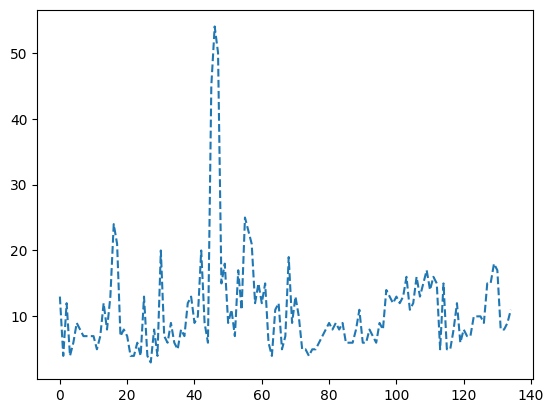

In [15]:
 plt.plot(PM10, '--', label='ML Predictions')

In [17]:
from gtda.time_series import SingleTakensEmbedding, takens_embedding_optimal_parameters
import plotly.graph_objects as go
from gtda.plotting import plot_point_cloud

In [32]:
PM10[1]

4

In [53]:
x_contaminantes = PM10.index
y_contaminantes = [PM10[i] for i in x_contaminantes]

# Escogemos nuestros parametros para el encaje
# d= embedding_dimension_periodic
# tau = embedding_time_delay_periodic
# stride = nos permite tomar un subconjunto de los datos.
embedding_dimension_periodic = 3
embedding_time_delay_periodic = 30
stride = 1

# Modifica el `stride` y el `delay` para obtener diferentes encajes, de lo anterior.

embedder_periodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay_periodic,
    dimension=embedding_dimension_periodic,
    stride=stride,
)

y_periodic_embedded = embedder_periodic.fit_transform(y_contaminantes)
print(f"Shape of embedded time series: {y_periodic_embedded.shape}")

Shape of embedded time series: (75, 3)


In [50]:
plot_point_cloud(y_periodic_embedded)

In [54]:
from gtda.homology import VietorisRipsPersistence

y_periodic_embedded = y_periodic_embedded[None, :, :]
# 0 - connected components, 1 - loops, 2 - voids
homology_dimensions = [0, 1, 2]

contaminantes_persistence = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=1
)
print("Persistence diagram for periodic signal")
contaminantes_persistence.fit_transform_plot(y_periodic_embedded)

Persistence diagram for periodic signal


array([[[ 0.        ,  1.        ,  0.        ],
        [ 0.        ,  1.        ,  0.        ],
        [ 0.        ,  1.        ,  0.        ],
        [ 0.        ,  1.41421354,  0.        ],
        [ 0.        ,  1.41421354,  0.        ],
        [ 0.        ,  1.41421354,  0.        ],
        [ 0.        ,  1.41421354,  0.        ],
        [ 0.        ,  1.41421354,  0.        ],
        [ 0.        ,  1.41421354,  0.        ],
        [ 0.        ,  1.73205078,  0.        ],
        [ 0.        ,  1.73205078,  0.        ],
        [ 0.        ,  1.73205078,  0.        ],
        [ 0.        ,  1.73205078,  0.        ],
        [ 0.        ,  1.73205078,  0.        ],
        [ 0.        ,  1.73205078,  0.        ],
        [ 0.        ,  1.73205078,  0.        ],
        [ 0.        ,  2.        ,  0.        ],
        [ 0.        ,  2.        ,  0.        ],
        [ 0.        ,  2.        ,  0.        ],
        [ 0.        ,  2.        ,  0.        ],
        [ 0.        